In [1]:
data <- read.csv('data.csv')

In [9]:
head(data)

ï..Area_Name,Year,Group_Name,Sub_Group_Name,Cases_Property_Recovered,Cases_Property_Stolen,Value_of_Property_Recovered,Value_of_Property_Stolen
Andaman & Nicobar Islands,2001,Burglary - Property,3. Burglary,27,64,755858,1321961
Andhra Pradesh,2001,Burglary - Property,3. Burglary,3321,7134,51483437,147019348
Arunachal Pradesh,2001,Burglary - Property,3. Burglary,66,248,825115,4931904
Assam,2001,Burglary - Property,3. Burglary,539,2423,3722850,21466955
Bihar,2001,Burglary - Property,3. Burglary,367,3231,2327135,17023937
Chandigarh,2001,Burglary - Property,3. Burglary,119,364,1804823,10217378


In [ ]:
library(ggplot2)
library(dplyr)

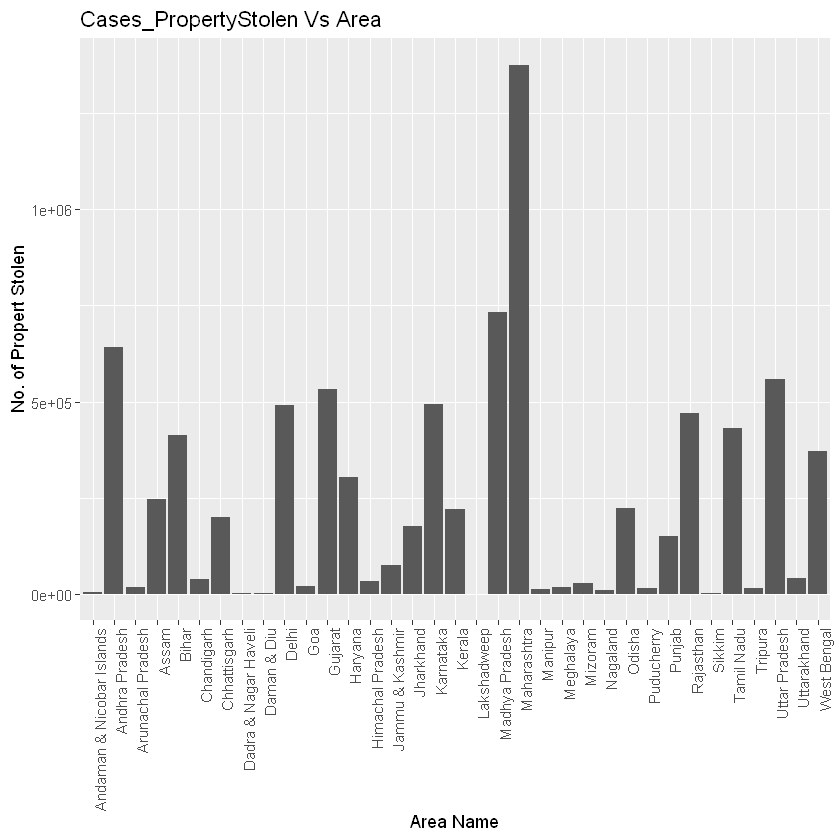

In [23]:
ggplot(data=data,aes(x=ï..Area_Name,y=Cases_Property_Stolen)) +
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
labs(title="Cases_PropertyStolen Vs Area",x="Area Name",y="No. of Propert Stolen") 

States like Maharashtra,Andhra Pradesh shows a significantly higher number of cases compared to smaller areas like Dadra & Nagar Haveli or Arunachal Pradesh. This suggests that populous states tend to report more burglary cases, likely due to their larger population and economic activity.

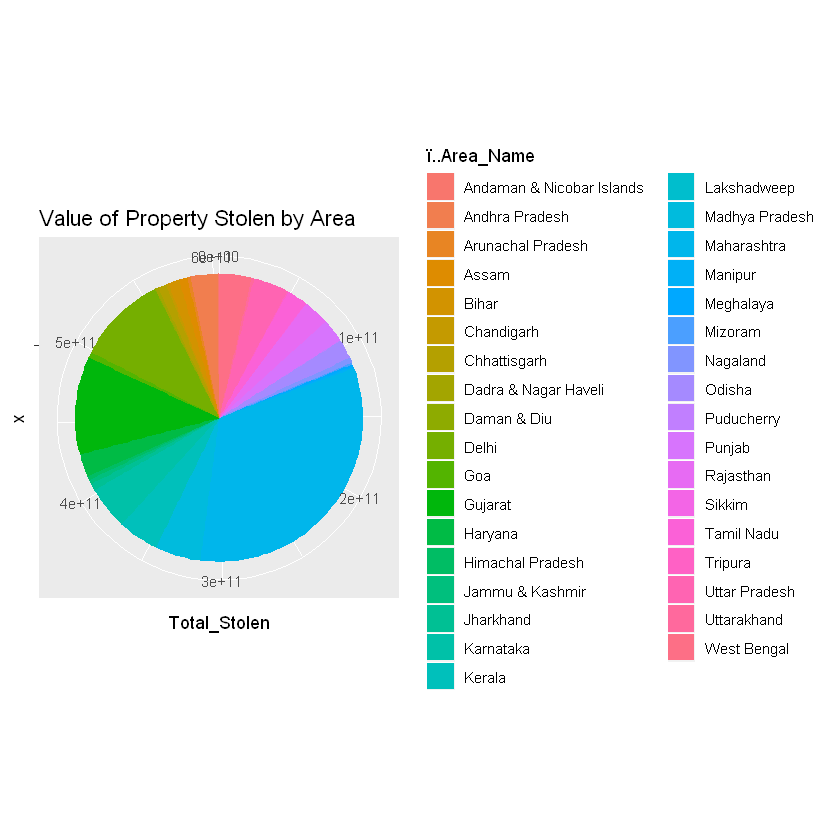

In [43]:
property_stolen_sum <- data %>%
  group_by(ï..Area_Name) %>%
  summarize(Total_Stolen = sum(Value_of_Property_Stolen))

ggplot(property_stolen_sum, aes(x = "", y = Total_Stolen, fill = ï..Area_Name)) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar("y", start = 0) +
  labs(title = "Value of Property Stolen by Area")

Maharashtra,Andhra Pradesh and Chhattisgarh may take up large portions of the chart, indicating that these regions not only report a higher number of cases but also experience greater financial losses due to burglaries.

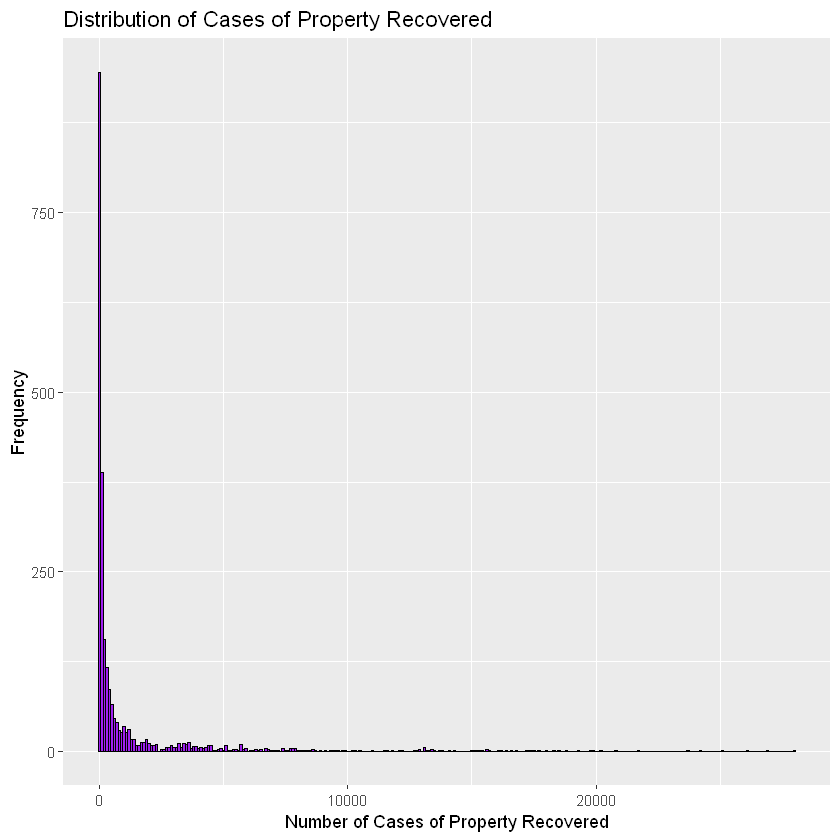

In [45]:
ggplot(data, aes(x = Cases_Property_Recovered)) +
  geom_histogram(binwidth = 100, fill = "purple", color = "black") +
  labs(title = "Distribution of Cases of Property Recovered", x = "Number of Cases of Property Recovered", y = "Frequency")

Majority of regions recover fewer cases, indicating a lower recovery rate overall. However, some regions could display higher recoveries, showcasing effective law enforcement or recovery mechanisms in those areas.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


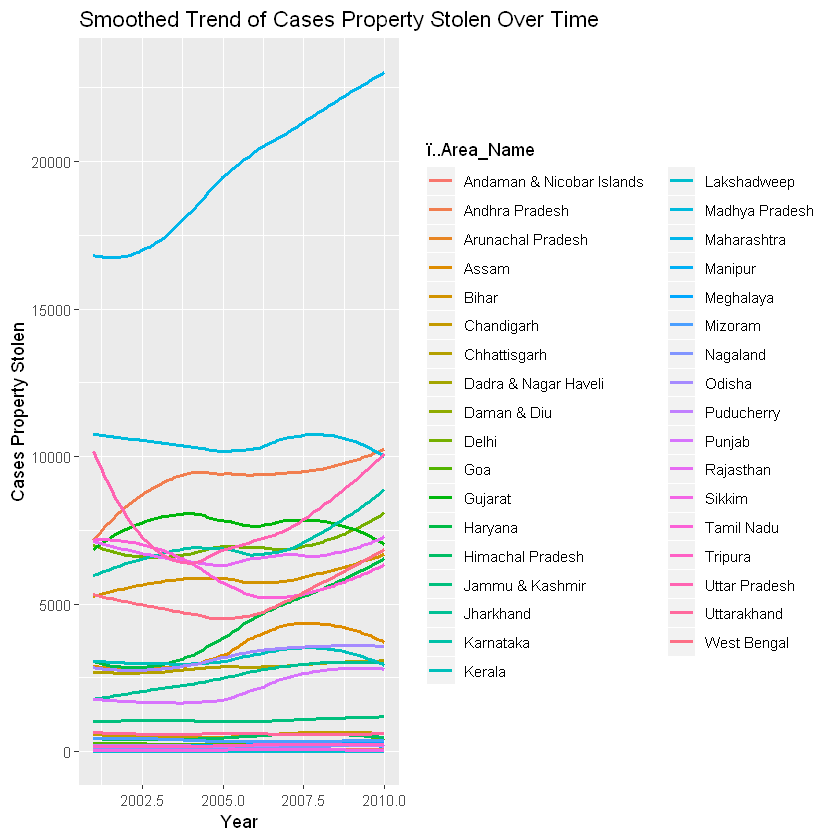

In [49]:
# Rename the column first (if needed)
colnames(data)[1] <- "ï..Area_Name"

# Plot using a smoothed line
ggplot(data, aes(x = Year, y = Cases_Property_Stolen, color = ï..Area_Name)) +
  geom_smooth(se = FALSE) +  # Adds a smoothed trend line without the standard error shading
  labs(title = "Smoothed Trend of Cases Property Stolen Over Time", x = "Year", y = "Cases Property Stolen")


Andhra Pradesh and Maharashtra show a significant increase in stolen property cases, with Andhra Pradesh leading the trend. On the other hand, regions like Delhi and Gujarat exhibit a more stable pattern, with only slight fluctuations over time. Most regions experience minimal changes, maintaining relatively lower levels of stolen cases.

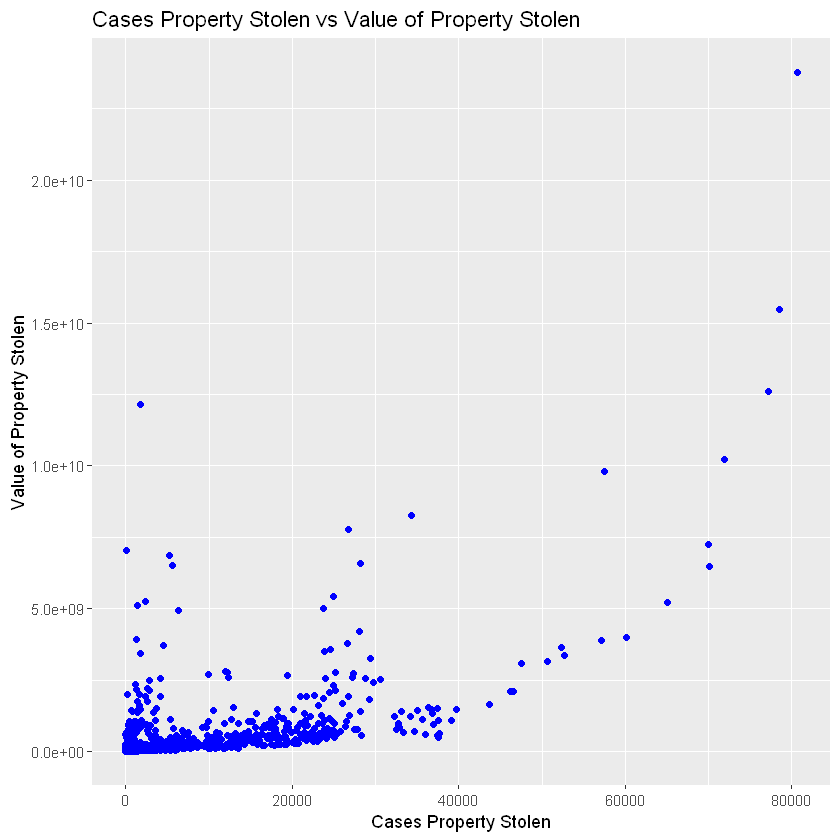

In [36]:
ggplot(data, aes(x = Cases_Property_Stolen, y = Value_of_Property_Stolen)) +
  geom_point(color = "blue") +
  labs(title = "Cases Property Stolen vs Value of Property Stolen", x = "Cases Property Stolen", y = "Value of Property Stolen")

Regions with a high number of cases and high property value losses may point to organized crime activities, whereas regions with fewer cases and lower value losses may indicate sporadic theft.

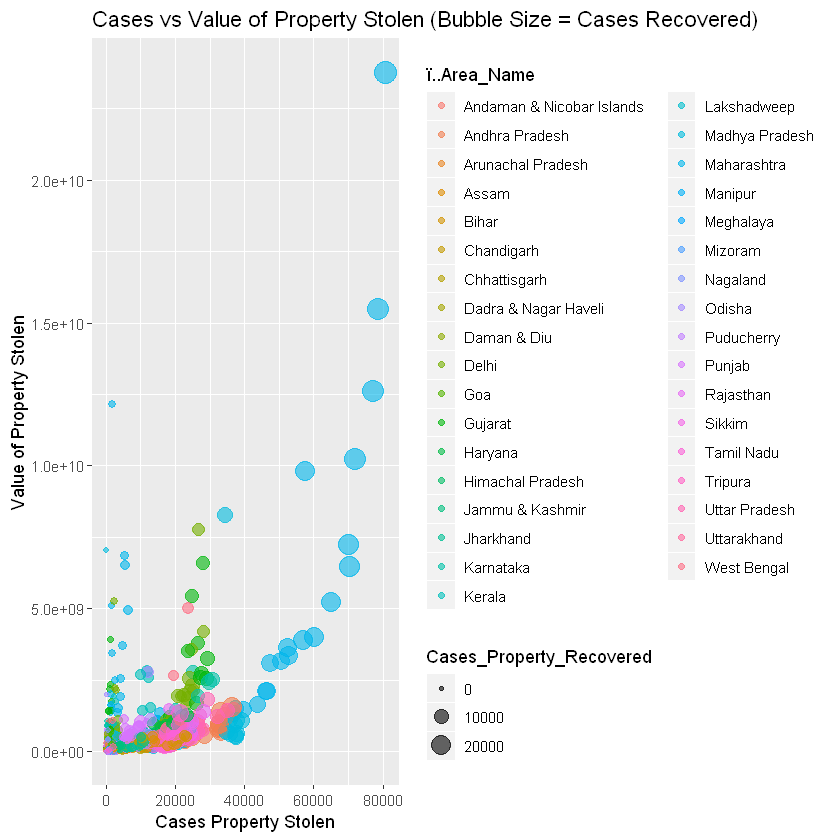

In [39]:
ggplot(data, aes(x = Cases_Property_Stolen, y = Value_of_Property_Stolen, size = Cases_Property_Recovered, color = ï..Area_Name)) +
  geom_point(alpha = 0.6) +
  labs(title = "Cases vs Value of Property Stolen (Bubble Size = Cases Recovered)", x = "Cases Property Stolen", y = "Value of Property Stolen")

Andhra Pradesh,Maharashtra regions experience a high volume of theft, as seen from the high number of stolen cases and large amounts of stolen property. However, they are also notable for having a large number of recovered cases, which reflects strong law enforcement and effective recovery operations